In [1]:
########################################################
# Sites:
# 1 = Sandnes
# 2 = Iffiartafik
# 3 = Qoornoq
# 4 = Ersaa
# 5 = Kangeq
# 6 = all
# 7 = all_separate
#
# Types:
# Natural = 1
# Cultural = 2
# both = 3
#
# Variables:
# NB: to use log(variable) add 0.1 to variable number
# 1 = soil water content
# 2 = pH
# 6 = Soil weight
# 7 = Remaining soil after sifting
# 8 = waste by sifting
# 10 = Roots < 1mm (dry)
# 11 = Roots > 1mm (dry)
# 12 = Horse tail (dry)
# 13 = Roots < 1mm (dry) /kg dry soil
# 14 = Roots > 1mm (dry) /kg dry soil
# 15 = Horse tail (dry) /kg dry soil
# 20 = Total biomass
# 21 = NDVI handheld
# 22 = LAI
# 30 = Phosphor concentration in analysis
# 31 = Phosphor/kg dry soil
# 32 = Phosphor/kg dry soil - blank corrected
# 40 = NO3 concentration in analysis
# 41 = NH4 concentration in analysis
# 42 = TOC concentration in analysis
# 43 = TN concentration in analysis
# 44 = NO3 in dry soil, blank corrected
# 45 = NH4 in dry soil, blank corrected
# 46 = TN in dry soil, blank corrected (Total nitrogen)
# 47 = DON in dry soil, blank corrected (Dissolved organic nitrogen, eg. aminosyrer)
# 48 = TOC in dry soil, blank corrected (Total organic carbon)

# plot modes:
# 1 = all plots

# 2 = pool natural/cultural plots together and plot mean
# 2.1 = add std as error plot
# 2.2 = add std as shaded area

# 3 = Scatter plot

# 4 = Scatter plot mean
# 4.1 = add std error bar on y-axis
# 4.2 = add std error bar on x-axis
# 4.3 = add std error bar on both axes

#########################################################

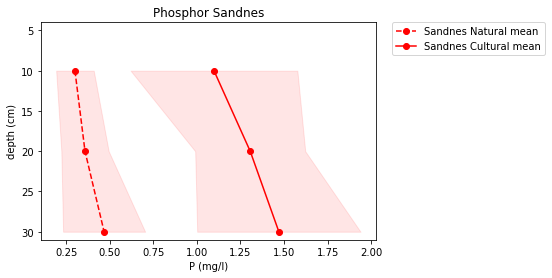

In [2]:
from plotfunctions import *
%matplotlib inline

inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.31.xlsx'
sites = 1
types = 3
variable_1 = 30
variable_2 = 21.1
plotmode = 2.2
reg = True

################
if sites == 7:
    for num in range(1,7):
        plot(inFile, num, types, variable_1, variable_2, plotmode, reg)
else:
    plot(inFile, sites, types, variable_1, variable_2, plotmode, reg)

In [1]:
from plotfunctions import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.31.xlsx'
sites = 7
variable = 30

################
if sites == 7:
    for num in range(1,6):
        ttest_stype(inFile, num, variable)
else:
    ttest_stype(inFile, sites, variable)



Sandnes
Natural vs Cultural
10cm: 	t = -3.63697  	p = 0.01264 	significant
20cm: 	t = -6.16655  	p = 0.00052 	significant
30cm: 	t = -4.17226  	p = 0.00339 	significant

Iffiartafik
Natural vs Cultural
5cm: 	t = -1.58954  	p = 0.16881 	not significant
10cm: 	t = -2.69777  	p = 0.04380 	significant
20cm: 	t = -6.43654  	p = 0.00023 	significant
30cm: 	t = -2.14919  	p = 0.15812 	not significant

Qoornoq
Natural vs Cultural
5cm: 	t = -3.20636  	p = 0.02079 	significant
10cm: 	t = -4.67123  	p = 0.00497 	significant
20cm: 	t = -3.61113  	p = 0.01305 	significant
30cm: 	t = -3.53926  	p = 0.13290 	not significant


/Users/rasmus/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)



Ersaa
Natural vs Cultural
5cm: 	t = nan  	p = nan 	nan
10cm: 	t = -2.94044  	p = 0.03774 	significant
20cm: 	t = -3.55108  	p = 0.03358 	significant
30cm: 	t = nan  	p = nan 	nan

Kangeq
Natural vs Cultural
5cm: 	t = nan  	p = nan 	nan
10cm: 	t = -7.69634  	p = 0.00049 	significant
20cm: 	t = -5.01342  	p = 0.00078 	significant
30cm: 	t = -7.41815  	p = 0.00031 	significant


In [1]:
from plotfunctions import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.31.xlsx'
site1 = 1
site2 = 7
stype = 2
variable = 30

################
if site2 == 7:
    for num in range(1,6):
        ttest_site(inFile, site1, num, stype, variable)
else:
    ttest_site(inFile, site1, site2, stype, variable)

Cultural
Sandnes vs Sandnes
10cm: 	t = 0.00000  	p = 1.00000 	not significant
20cm: 	t = 0.00000  	p = 1.00000 	not significant
30cm: 	t = 0.00000  	p = 1.00000 	not significant
Cultural
Sandnes vs Iffiartafik
10cm: 	t = 1.22638  	p = 0.25337 	not significant
20cm: 	t = 2.36261  	p = 0.05202 	not significant
30cm: 	t = 2.82135  	p = 0.03625 	significant
Cultural
Sandnes vs Qoornoq
10cm: 	t = -1.39705  	p = 0.19420 	not significant
20cm: 	t = -0.87569  	p = 0.41209 	not significant
30cm: 	t = 1.77659  	p = 0.15691 	not significant


/Users/rasmus/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


Cultural
Sandnes vs Ersaa
10cm: 	t = 0.84617  	p = 0.42250 	not significant
20cm: 	t = 0.31434  	p = 0.76592 	not significant
30cm: 	t = 1.13122  	p = 0.30770 	not significant
Cultural
Sandnes vs Kangeq
10cm: 	t = 0.50714  	p = 0.62903 	not significant
20cm: 	t = 1.94110  	p = 0.08787 	not significant
30cm: 	t = 1.05737  	p = 0.32238 	not significant
